investigate clustering methods which allow for overlap

- CPM - uses too much RAM - got to 30GB and crashed vscode
- SKNN + iterate infomap
- SCP - have to make own implementation?
- hierarchical

In [2]:
import pandas as pd
import networkx as nx
import igraph as ig
import seaborn as sns
from ease import EASE
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

path = "./files/"

In [7]:
regulome_edges = pd.read_csv(path+"human_regulome_pd.gz")
regulome_graph = ig.Graph.DataFrame(regulome_edges, directed=False)
regulome_adjacency = regulome_graph.get_adjacency_sparse()
transitivities = regulome_graph.transitivity_local_undirected(mode='zero')

In [8]:
pca = PCA(n_components=20).fit(regulome_adjacency)
pca.explained_variance_

array([0.61449521, 0.2870497 , 0.05644734, 0.0453383 , 0.03301049,
       0.02224705, 0.0208313 , 0.01771183, 0.01710181, 0.01540015,
       0.01465124, 0.01417773, 0.01395652, 0.01321165, 0.0124903 ,
       0.01178649, 0.01155822, 0.01068702, 0.01043265, 0.01011333])

(-0.02, 0.0)

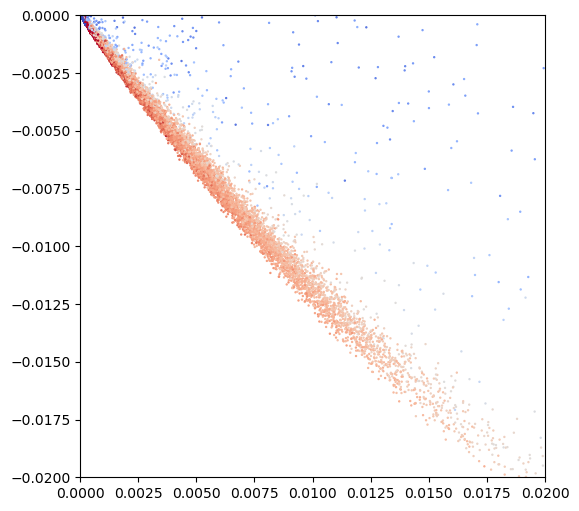

In [15]:
x = pca.components_[0]
y = pca.components_[1]
z = pca.components_[2]

fig = plt.figure(figsize=[6,6])
ax = plt.subplot()
ax.scatter(x,y, c=transitivities, cmap='coolwarm', s=0.5)
ax.set_xlim([0,0.02])
ax.set_ylim([-0.02,0])